# Predicting Health Insurance Fraud Using Machine Learning

### Group 2: Nhan Nguyen, Tan Nguyen, Andre Serna

<h2>I. Schedule</h2>

---

<h2>II. Completed tasks</h2>

In [163]:
# Basic Data Handling
import pandas as pd
import numpy as np
import os # Used for navigating folders, listing files, creating/deleting folders 

# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preprocessing & Machine Learning Tools
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Handling Imbalanced Datasets
# SMOTE = Synthetic Minority Over-sampling Technique
# This helps generate synthetic data for the minority class (e.g., fraud cases)
# Useful when the dataset is imbalanced (few fraudulent cases vs. many non-fraud)
from imblearn.over_sampling import SMOTE


In [164]:
# Warnings and Plot Settings
import warnings
warnings.filterwarnings('ignore')

# Plot Styles
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (7, 5)

### **1. Organize and Load Data**
We Organize and Load Data Using Folder-Wise Dictionaries
In this project, we work with three distinct datasets:

- **CMS Medicare billing data**

- **Kaggle healthcare fraud data**

- **Synthea synthetic health records**

Each of these data sources includes multiple CSV files representing different aspects of healthcare data (e.g., patient records, procedures, claims, and providers). To ensure a clean, scalable, and maintainable workflow, we organize the data using the following strategy:

**Folder-Wise Data Storage:**
We place the CSV files into separate folders based on their source:

- CMS

- Kaggle

- Synthea

This will helps to keep files organized and avoids confusion, simplifies access when working with multiple files and prevents naming conflicts between datasets with similar file names.



In [166]:
# Root folder where all subfolders live
root = "C:\\Users\\nhanf\\OneDrive\\Máy tính\\Machine Learning 4419"  

# Names of subfolders
subfolders = ['CMS', 'Kaggle', 'Synthea']

# Master dictionary to store datasets
all_data = {}

# Loop through each subfolder
for subfolder in subfolders:
    folder_path = os.path.join(root, subfolder)
    dataset_dict = {}
    for filename in os.listdir(folder_path):
        if filename.endswith(".csv"):
            file_path = os.path.join(folder_path, filename)
            df_name = filename.replace(".csv", "")
            dataset_dict[df_name] = pd.read_csv(file_path)
            print(f"✅ Loaded {df_name} from {subfolder}")
    all_data[subfolder] = dataset_dict

✅ Loaded MUP_PHY_R24_P05_V10_D22_Geo from CMS
✅ Loaded Test-1542969243754 from Kaggle
✅ Loaded Test_Beneficiarydata-1542969243754 from Kaggle
✅ Loaded Test_Inpatientdata-1542969243754 from Kaggle
✅ Loaded Test_Outpatientdata-1542969243754 from Kaggle
✅ Loaded Train-1542865627584 from Kaggle
✅ Loaded Train_Beneficiarydata-1542865627584 from Kaggle
✅ Loaded Train_Inpatientdata-1542865627584 from Kaggle
✅ Loaded Train_Outpatientdata-1542865627584 from Kaggle
✅ Loaded allergies from Synthea
✅ Loaded careplans from Synthea
✅ Loaded claims from Synthea
✅ Loaded claims_transactions from Synthea
✅ Loaded conditions from Synthea
✅ Loaded devices from Synthea
✅ Loaded encounters from Synthea
✅ Loaded imaging_studies from Synthea
✅ Loaded immunizations from Synthea
✅ Loaded medications from Synthea
✅ Loaded observations from Synthea
✅ Loaded organizations from Synthea
✅ Loaded patients from Synthea
✅ Loaded payers from Synthea
✅ Loaded payer_transitions from Synthea
✅ Loaded procedures from Synth

### **2. CMS Medicare Dataset: Analysis, Visualization, and Preprocessing**

In [168]:
# Access CMS dataset from the organized data dictionary
cms_df = all_data['CMS']['MUP_PHY_R24_P05_V10_D22_Geo']

# Preview the data
cms_df.head()


,Rndrng_Prvdr_Geo_Lvl,Rndrng_Prvdr_Geo_Cd,Rndrng_Prvdr_Geo_Desc,HCPCS_Cd,HCPCS_Desc,HCPCS_Drug_Ind,Place_Of_Srvc,Tot_Rndrng_Prvdrs,Tot_Benes,Tot_Srvcs,Tot_Bene_Day_Srvcs,Avg_Sbmtd_Chrg,Avg_Mdcr_Alowd_Amt,Avg_Mdcr_Pymt_Amt,Avg_Mdcr_Stdzd_Amt
0,National,NaN,National,0001A,Intramuscular administration of single severe ...,N,F,38,296,296.0,296,57.443919,38.484459,38.484459,39.200000
1,National,NaN,National,0001A,Intramuscular administration of single severe ...,N,O,14838,56302,56757.0,56757,59.725203,39.708255,39.708255,39.163531
2,National,NaN,National,0001U,Red blood cell typing,N,O,5,41,41.0,41,1452.195122,704.234146,704.234146,705.600000
3,National,NaN,National,0002A,Intramuscular administration of single severe ...,N,F,31,57,57.0,57,82.231579,38.802632,38.802632,39.200000
4,National,NaN,National,0002A,Intramuscular administration of single severe ...,N,O,15396,43724,43892.0,43889,64.252195,39.305816,39.305816,39.075750


#### **2.1 Check Data Types & Structure**

In [170]:
# Check the shape and column of the DataFrame
cms_df.info()  # Includes shape, column names, and data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270673 entries, 0 to 270672
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Rndrng_Prvdr_Geo_Lvl   270673 non-null  object 
 1   Rndrng_Prvdr_Geo_Cd    257348 non-null  object 
 2   Rndrng_Prvdr_Geo_Desc  270670 non-null  object 
 3   HCPCS_Cd               270673 non-null  object 
 4   HCPCS_Desc             270673 non-null  object 
 5   HCPCS_Drug_Ind         270673 non-null  object 
 6   Place_Of_Srvc          270673 non-null  object 
 7   Tot_Rndrng_Prvdrs      270673 non-null  int64  
 8   Tot_Benes              270673 non-null  int64  
 9   Tot_Srvcs              270673 non-null  float64
 10  Tot_Bene_Day_Srvcs     270673 non-null  int64  
 11  Avg_Sbmtd_Chrg         270673 non-null  float64
 12  Avg_Mdcr_Alowd_Amt     270673 non-null  float64
 13  Avg_Mdcr_Pymt_Amt      270673 non-null  float64
 14  Avg_Mdcr_Stdzd_Amt     270673 non-nu

In [171]:
# Show data types of all columns
cms_df.dtypes

Rndrng_Prvdr_Geo_Lvl      object
Rndrng_Prvdr_Geo_Cd       object
Rndrng_Prvdr_Geo_Desc     object
HCPCS_Cd                  object
HCPCS_Desc                object
HCPCS_Drug_Ind            object
Place_Of_Srvc             object
Tot_Rndrng_Prvdrs          int64
Tot_Benes                  int64
Tot_Srvcs                float64
Tot_Bene_Day_Srvcs         int64
Avg_Sbmtd_Chrg           float64
Avg_Mdcr_Alowd_Amt       float64
Avg_Mdcr_Pymt_Amt        float64
Avg_Mdcr_Stdzd_Amt       float64
dtype: object

#### **2.2 Check for Missing Values**

In [173]:
# Count missing values per column
missing_counts = cms_df.isnull().sum()
missing_percent = (missing_counts / len(cms_df)) * 100

# Show only columns with missing data
missing_summary = pd.DataFrame({
    'Missing Values': missing_counts,
    'Percent Missing': missing_percent
})
missing_summary = missing_summary[missing_summary['Missing Values'] > 0]
missing_summary.sort_values(by='Percent Missing', ascending=False)


,Missing Values,Percent Missing
Rndrng_Prvdr_Geo_Cd,13325,4.922914
Rndrng_Prvdr_Geo_Desc,3,0.001108


#### **2.3 CMS Data Preprocessing**

In [175]:
# Show missing values again (recap)
cms_df.isnull().sum().sort_values(ascending=False).head(10)


Rndrng_Prvdr_Geo_Cd      13325
Rndrng_Prvdr_Geo_Desc        3
Rndrng_Prvdr_Geo_Lvl         0
HCPCS_Cd                     0
HCPCS_Desc                   0
HCPCS_Drug_Ind               0
Place_Of_Srvc                0
Tot_Rndrng_Prvdrs            0
Tot_Benes                    0
Tot_Srvcs                    0
dtype: int64

We treat **Rndrng_Prvdr_Geo_Cd** as categorical string and fill with 'Unknown'.

In [177]:
# Convert Rndrng_Prvdr_Geo_Cd (FIPS code) to string so it can be treated as a categorical variable
cms_df['Rndrng_Prvdr_Geo_Cd'] = cms_df['Rndrng_Prvdr_Geo_Cd'].astype(str)

# Fill missing FIPS codes with 'Unknown' to preserve rows and treat them as a separate category
cms_df['Rndrng_Prvdr_Geo_Cd'].fillna('Unknown', inplace=True)

# Fill missing state names (Rndrng_Prvdr_Geo_Desc) with 'Unknown' to avoid dropping rows during visualizations or grouping
cms_df['Rndrng_Prvdr_Geo_Desc'].fillna('Unknown', inplace=True)


**Handling Outliers in Submitted Charges**

The *Avg_Sbmtd_Chrg* column in the CMS dataset represents the average submitted charge for a medical service by providers. A boxplot analysis revealed that this variable contains **significant outliers**, with a small number of records showing extremely high charges (some exceeding $100,000), while the majority of data points are concentrated near zero.

To ensure clearer visualizations and more stable statistical models, we applied a **capping strategy** using the **99th percentile (Winsorization)**. This method preserves most of the distribution while preventing a small number of extreme values from dominating charts and skewing metrics like the mean and standard deviation.

We created a new column, *Avg_Sbmtd_Chrg_Capped*, for use in visualizations and modeling. This ensures we retain the original values for reference while using the capped version for analysis.



In [179]:
# Cap Avg_Sbmtd_Chrg at 99th percentile to reduce impact of extreme outliers
cap_value = cms_df['Avg_Sbmtd_Chrg'].quantile(0.99)
cms_df['Avg_Sbmtd_Chrg_Capped'] = cms_df['Avg_Sbmtd_Chrg'].apply(lambda x: min(x, cap_value))


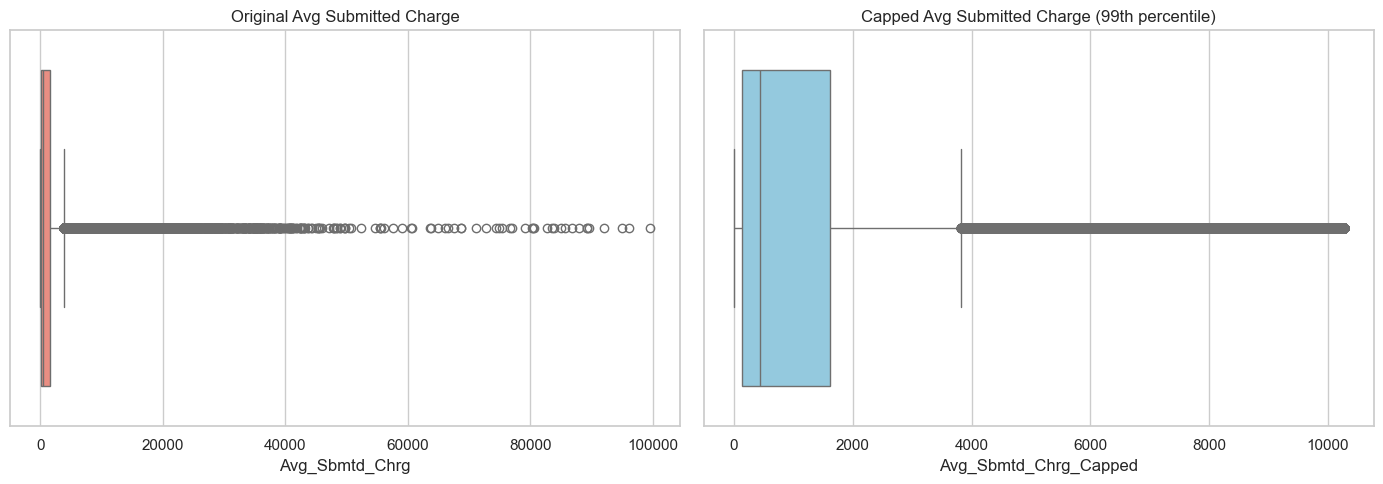

In [180]:
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# Original
sns.boxplot(x=cms_df['Avg_Sbmtd_Chrg'], ax=axs[0], color='salmon')
axs[0].set_title('Original Avg Submitted Charge')

# Capped
sns.boxplot(x=cms_df['Avg_Sbmtd_Chrg_Capped'], ax=axs[1], color='skyblue')
axs[1].set_title('Capped Avg Submitted Charge (99th percentile)')

plt.tight_layout()
plt.show()


#### **2.4 Describe the statistics of the data variables**

In [182]:
# Display descriptive statistics for key numeric columns
cms_df[['Tot_Srvcs', 'Tot_Rndrng_Prvdrs', 'Tot_Benes',
        'Avg_Sbmtd_Chrg', 'Avg_Mdcr_Pymt_Amt', 'Avg_Mdcr_Stdzd_Amt']].describe().T


,count,mean,std,min,25%,50%,75%,max
Tot_Srvcs,270673.0,23594.607828,618354.228806,11.000000,40.000000,162.000000,1102.000000,1.033257e+08
Tot_Rndrng_Prvdrs,270673.0,266.753924,3279.531740,1.000000,11.000000,29.000000,95.000000,6.019110e+05
Tot_Benes,270673.0,5342.793747,110063.595958,11.000000,30.000000,106.000000,586.000000,2.145959e+07
Avg_Sbmtd_Chrg,270673.0,1309.701656,2525.174026,0.000103,127.039817,440.559240,1606.741000,9.950980e+04
Avg_Mdcr_Pymt_Amt,270673.0,232.247881,644.535722,0.000000,27.780595,85.518203,250.715652,4.661260e+04
Avg_Mdcr_Stdzd_Amt,270673.0,230.059629,640.828785,0.000079,27.596064,85.034015,249.340000,4.657795e+04


**Descriptive Statistics of Key CMS Variables**
We examined the main numerical variables in the CMS dataset. The results from .describe() show the following patterns:

- **Tot_Srvcs** (Total Services):

     Ranges from a minimum of 1 to a maximum of over 2 million, with a mean around 7600.

     Indicates huge variation in how often different services are billed.

- **Tot_Benes** (Number of Beneficiaries):

     Shows a similar trend — a few services reach a large Medicare population, while most serve very few.

- **Avg_Sbmtd_Chrg** (Submitted Charges):

     Highly skewed to the right, with a median much lower than the mean, confirming the presence of extreme outliers.

     Min charge is near 0. While max reaches 100,000+, though 99% of values are below $10,000.
    
- **Avg_Mdcr_Pymt_Amt** (Amount Medicare Paid):

     Closely follows the same pattern as submitted charge but generally lower (as Medicare doesn't pay full charge).

     This can reveal gaps between billed and approved amounts — possibly indicating upcoding or overbilling.

- **Tot_Rndrng_Prvdrs** (Number of Rendering Providers):

     Averages suggest most services are offered by a limited number of providers, while a few procedures are performed by many.



#### **2.5 Data Visualized**

##### **2.5.1 Total Services by State**

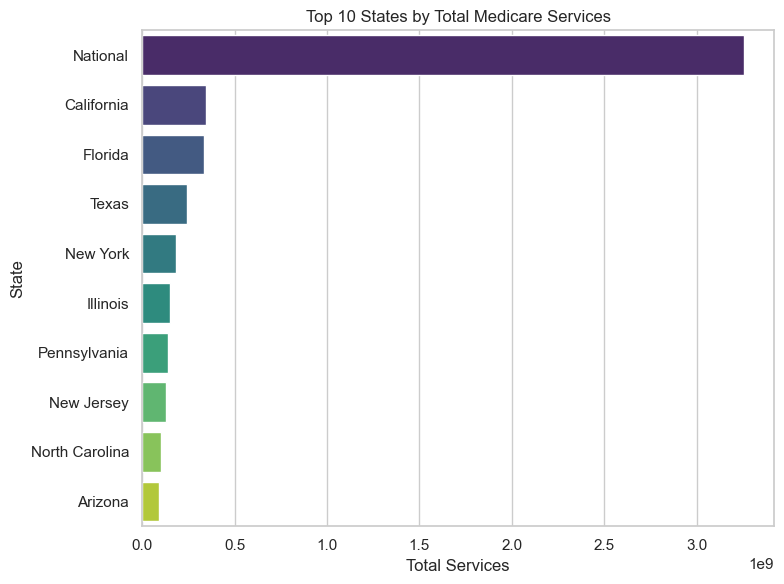

In [185]:
# Top 10 states by total services
top_states = cms_df.groupby('Rndrng_Prvdr_Geo_Desc')['Tot_Srvcs'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(8, 6))
sns.barplot(x=top_states.values, y=top_states.index, palette="viridis")
plt.title('Top 10 States by Total Medicare Services')
plt.xlabel('Total Services')
plt.ylabel('State')
plt.tight_layout()
plt.show()

##### **2.5.2 Avg Submitted Charge by Place of Service**

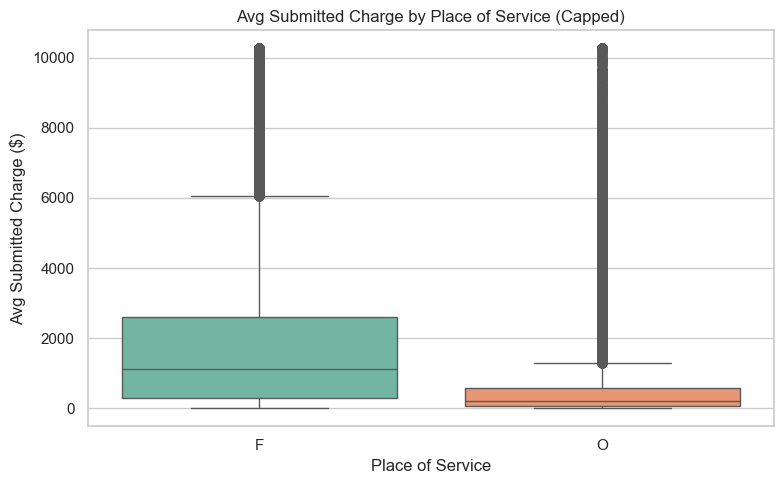

In [187]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=cms_df, x='Place_Of_Srvc', y='Avg_Sbmtd_Chrg_Capped', palette="Set2")
plt.title('Avg Submitted Charge by Place of Service (Capped)')
plt.xlabel('Place of Service')
plt.ylabel('Avg Submitted Charge ($)')
plt.tight_layout()
plt.show()
# Identifies whether the place of service submitted on the claims is a facility (value of ‘F’) or non-facility (value of ‘O’).

The CMS dataset contains both numerical and categorical variables. Key categorical variables include geographic indicators (**Rndrng_Prvdr_Geo_Lvl**, **Rndrng_Prvdr_Geo_Desc**, **Place_Of_Srvc**) and service identifiers (**HCPCS_Cd**). Numerical variables such as **Tot_Srvcs**, **Avg_Sbmtd_Chrg**, and **Avg_Mdcr_Pymt_Amt** represent service volume and financial data. Missing values are minimal and mostly found in drug indicator or geographic labels, and will be handled using imputation or by dropping if appropriate.

### **3. Kaggle Dataset: Analysis, Visualization, and Preprocessing**

#### **3.1 Load the data from the dictionary**

In [211]:
# Load the main training dataset (has fraud labels)
kaggle_train_df = all_data['Kaggle']['Train-1542865627584']

# Preview the data
kaggle_train_df.head()


,Provider,PotentialFraud
0,PRV51001,No
1,PRV51003,Yes
2,PRV51004,No
3,PRV51005,Yes
4,PRV51007,No


#### **3.2 Check Data Types & Structure**

In [220]:
# Check shape and structure
kaggle_train_df.info()

# Quick summary of all column names and types
kaggle_train_df.dtypes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5410 entries, 0 to 5409
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Provider        5410 non-null   object
 1   PotentialFraud  5410 non-null   object
dtypes: object(2)
memory usage: 84.7+ KB


Provider          object
PotentialFraud    object
dtype: object

#### **3.3 Check for Missing Values**

The primary Kaggle training file (`Train-1542865627584.csv`) contains 5,410 records and 2 columns:

- `Provider`: a unique identifier for each healthcare provider
- `PotentialFraud`: the target variable indicating suspected fraudulent activity

No missing values were found in this file, and both columns are of type `object`. No data cleaning is needed at this stage, though `PotentialFraud` will later be encoded as a binary variable (`1 = Fraud`, `0 = Not Fraud`) for modeling.

#### **3.4 Basic Statistics**

In [226]:
# Check class distribution
kaggle_train_df['PotentialFraud'].value_counts()


PotentialFraud
No     4904
Yes     506
Name: count, dtype: int64

To better understand the distribution of our target variable, we examined the frequency of `PotentialFraud` values. This variable is binary and identifies whether each provider is potentially involved in fraudulent activities.

Out of **5,410 total providers**:
- **4,904** are labeled as **"No"** (not fraudulent)
- **506** are labeled as **"Yes"** (potential fraud)

This reveals a clear **class imbalance**, with only **~9.4%** of providers flagged as potentially fraudulent.

Such imbalance is common in fraud detection tasks and has important implications:
- Predictive models trained on imbalanced data tend to favor the majority class ("No")
- Specialized techniques like **SMOTE (Synthetic Minority Over-sampling Technique)** or **undersampling** may be needed during model training
- Evaluation metrics must go beyond simple accuracy and include **precision, recall, F1-score**, and **AUC**

Visualizing this distribution confirms the imbalance and helps us prepare for modeling decisions later.

#### **3.5 Kaggle Data Visualized**

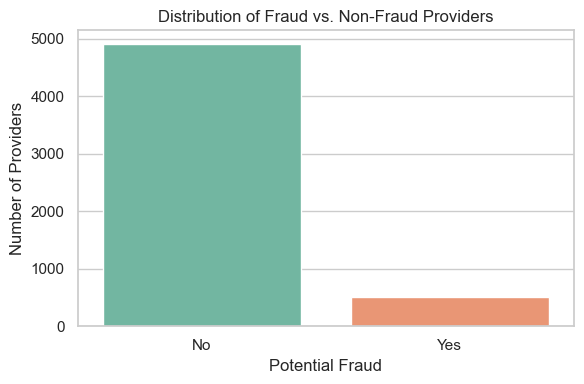

In [230]:
# Plot the distribution of the target variable
plt.figure(figsize=(6, 4))
sns.barplot(
    x=kaggle_train_df['PotentialFraud'].value_counts().index,
    y=kaggle_train_df['PotentialFraud'].value_counts().values,
    palette="Set2"
)
plt.title('Distribution of Fraud vs. Non-Fraud Providers')
plt.xlabel('Potential Fraud')
plt.ylabel('Number of Providers')
plt.tight_layout()
plt.show()


As shown in the bar chart above, the `PotentialFraud` variable is highly imbalanced. Fraudulent cases ("Yes") make up less than 10% of the data.

This imbalance confirms the need for proper data balancing techniques in our modeling phase, such as **SMOTE**, **undersampling**, or using **stratified sampling** when splitting the dataset.


### **4. Synthea Dataset: Analysis, Visualization, and Preprocessing**

## GitHub Repository

The full code, data handling process, and visualization scripts are available on GitHub:  
🔗 https://github.com/nhanizDee/Predicting-Health-Insurance-Fraud-Using-Machine-Learning
